Generated from Perplexity and modified on Cursor

In [1]:
# if requirements file is updated

# pip install -r requirements.txt

# if setup file is updated
# pip install .

In [1]:
import torch
from transformers import BertTokenizer, BertModel
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import re
import numpy as np
import os


In [18]:
def get_sentence_embedding(text):
    
    # Tokenize the input text
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    
    # Pass the input through the BERT model
    output = model(**encoded_input)
    
    # Extract the sentence embedding from the output
    sentence_embedding = output.pooler_output
    
    return sentence_embedding


def get_word_embeddings(text, target_word):

    # Tokenize the input text
    tokenized_text = tokenizer.tokenize(text)
    input_ids = tokenizer.convert_tokens_to_ids(tokenized_text)
    input_ids = torch.tensor([input_ids])
    
    # Generate the word embeddings
    output = model(input_ids)[0]  # The first element of the output is the word embeddings
    all_word_embeddings = output[0]
    
    # Find the index of the target word
    target_word_index = tokenized_text.index(target_word)
    
    # Extract the target word embeddings
    target_word_embeddings = all_word_embeddings[target_word_index]
    
    return all_word_embeddings, target_word_embeddings


# Measure polysemy  of a target word in a text corpus

def measure_polysemy(texts, word):
      
    embeddings = []
    for text in texts:
        if word in text:
            _, target_word_embeddings = get_word_embeddings(text, word)
            embeddings.append(target_word_embeddings)
        else:
            pass
    
    # Measure distances between embeddings
    distances = []
    for i in range(len(embeddings)):
        for j in range(i + 1, len(embeddings)):
            distance = cosine(embeddings[i].numpy().flatten(), embeddings[j].numpy().flatten())
            distances.append(distance)
    
    return distances

In [9]:
# textcorpus = []
# for file in os.listdir('../Text data'):
#     if file.endswith(".txt"):
#         with open(os.path.join('../Text data', file), 'r') as f:
#             textcorpus.append(f.read())

# textcorpus = ' '.join(textcorpus)
# # Clean up the textcorpus for preprocessing
# textcorpus = re.sub(r'\n', ' ', textcorpus)  # Remove newline characters
# textcorpus = re.sub(r'\s+', ' ', textcorpus)  # Remove extra whitespaces

# # Split the textcorpus into a list of sentence strings
# textcorpus_sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', textcorpus)
# print(textcorpus_sentences[:10])


["A Midsummer Night's Dream by William Shakespeare Edited by Barbara A.", 'Mowat and Paul Werstine with Michael Poston and Rebecca Niles Folger Shakespeare Library https://shakespeare.folger.edu/shakespeares-works/a-midsummer-nights-dream/ Created on Jul 31, 2015, from FDT version 0.9.2 Characters in the Play ====================== Four lovers: HERMIA LYSANDER HELENA DEMETRIUS THESEUS, duke of Athens HIPPOLYTA, queen of the Amazons EGEUS, father to Hermia PHILOSTRATE, master of the revels to Theseus NICK BOTTOM, weaver PETER QUINCE, carpenter FRANCIS FLUTE, bellows-mender TOM SNOUT, tinker SNUG, joiner ROBIN STARVELING, tailor OBERON, king of the Fairies TITANIA, queen of the Fairies ROBIN GOODFELLOW, a "puck," or hobgoblin, in Oberon\'s service A FAIRY, in the service of Titania Fairies attending upon Titania: PEASEBLOSSOM COBWEB MOTE MUSTARDSEED Lords and Attendants on Theseus and Hippolyta Other Fairies in the trains of Titania and Oberon ACT 1 ===== Scene 1 ======= [Enter Theseus, 

In [3]:
with open('../Text data/a-midsummer-nights-dream_TXT_FolgerShakespeare.txt', 'r') as file:
    text = file.read()
text = re.sub(r'\n', ' ', text)  # Remove newline characters
text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces

# Split the textcorpus into a list of sentence strings
text_sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

print(text_sentences[:1])

["A Midsummer Night's Dream by William Shakespeare Edited by Barbara A."]


In [7]:
# Load the pre-trained BERT model and tokenizer
model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


torch.Size([1, 768])


In [20]:
# Measure polysemy distances of the target word in the text setences

target_word='man'
distances = measure_polysemy(text_sentences, target_word)

ValueError: 'man' is not in list

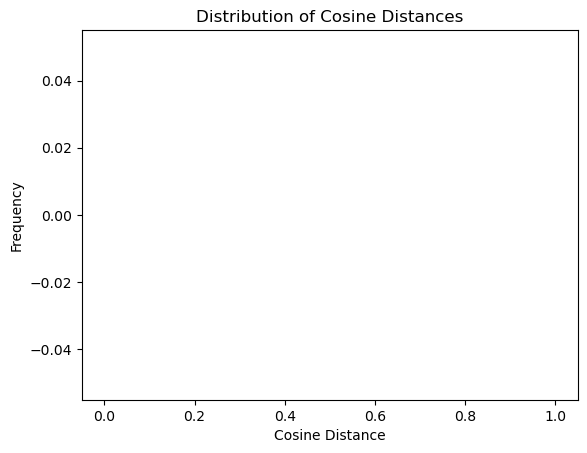

In [ ]:
plt.hist(distances, bins=150)
# plt.ylim(0, 100)  # Scale the y axis from 0 to 1000

plt.title("Distribution of Cosine Distances")
plt.xlabel("Cosine Distance")
plt.ylabel("Frequency")
plt.show()

